## Create Dataset

### Import Modules

In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

### Define Functions

In [2]:
def load_samples_from_folder(folder,size=(224,224),color_space='RGB'):
    images = []
    labels = []
    class_names = []

    # Get a sorted list of folder names in the directory
    all_folders = [f for f in os.listdir(folder) if os.path.isdir(os.path.join(folder, f))]
    all_folders.sort()  # Sort to ensure a consistent order
    
    # Select the first, middle, and last folder indices
    num_folders = len(all_folders)
    selected_indices = [0, num_folders // 2, num_folders - 1]
    
    # Load one image from each of these selected folders
    for idx in selected_indices:
        class_name = all_folders[idx]
        class_path = os.path.join(folder, class_name)
        
        # Store the class name for label reference
        class_names.append(class_name)
        
        # Load only one image from this folder
        img_files = os.listdir(class_path)
        if img_files:  # Ensure there is at least one file in the folder
            img_path = os.path.join(class_path, img_files[0])
            
            try:
                # Open, resize, and convert to the specified color space
                img = Image.open(img_path).convert(color_space)
                img = img.resize(size)
                img_array = np.array(img)
                
                # If grayscale, add a channel dimension to keep consistent shape
                if color_space == 'L':
                    img_array = img_array[:, :, np.newaxis]
                
                images.append(img_array)
                labels.append(idx)  # Use the folder index as the label
                
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    
    return np.array(images), np.array(labels), class_names

In [3]:
def load_images_from_folder(folder, size=(224, 224), color_space='RGB'):
    images = []
    labels = []
    class_names = []

    # Assign a numerical label to each folder (class)
    for idx, class_name in enumerate(os.listdir(folder)):
        class_path = os.path.join(folder, class_name)
        
        if not os.path.isdir(class_path):
            continue
        
        # Store the class name for label reference
        class_names.append(class_name)
        
        # Loop over all images in the class folder
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            
            try:
                # Open the image and convert to the specified color space
                img = Image.open(img_path).convert(color_space)
                
                # Resize the image to the specified size
                img = img.resize(size)
                
                # Convert the image to a NumPy array
                img_array = np.array(img)
                
                # If grayscale, add a channel dimension to keep consistent shape
                if color_space == 'L':  
                    img_array = img_array[:, :, np.newaxis]

                images.append(img_array)
                labels.append(idx)  # Use the index of the folder as the label
                
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    
    return np.array(images), np.array(labels), class_names



In [4]:
def plot_samples(images, labels, class_names):
    # Set up the plot
    plt.figure(figsize=(10, 5))
    
    # Plot each image
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)  # create a subplot for each image
        plt.imshow(images[i].squeeze(), cmap='gray' if images[i].shape[-1] == 1 else None)
        plt.title(class_names[i])
        plt.axis('off')  # Hide the axis for a cleaner look
    
    plt.show()

### Observe Samples

In [5]:
# Path to the dataset folder
dataset_folder = r".\Raw"

#### Base



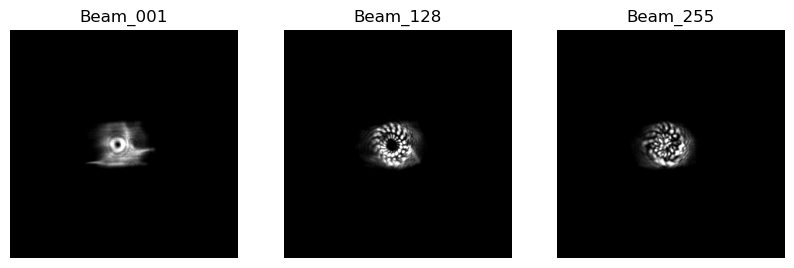

In [6]:
# Load the samples
images, labels, class_names = load_samples_from_folder(dataset_folder,(224,224),'RGB')

# Plot Samples
plot_samples(images, labels, class_names)

#### 112x112x3 px


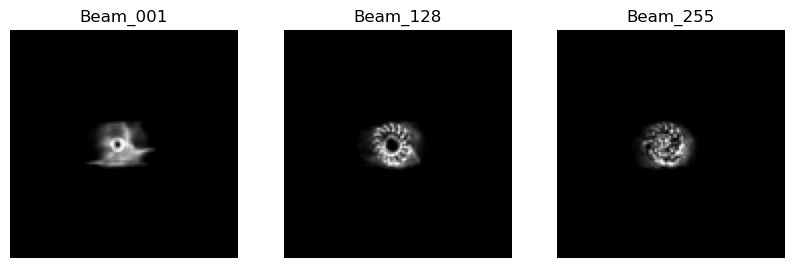

In [7]:
# Load the samples
images, labels, class_names = load_samples_from_folder(dataset_folder,(112,112),'RGB')

# Plot Samples
plot_samples(images, labels, class_names)

#### 56x56x3 px


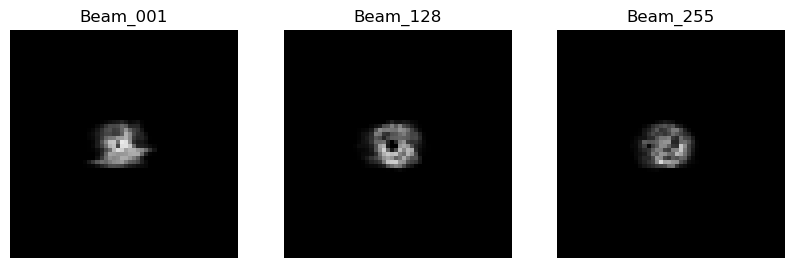

In [8]:
# Load the samples
images, labels, class_names = load_samples_from_folder(dataset_folder,(56,56),'RGB')

# Plot Samples
plot_samples(images, labels, class_names)

#### 28x28x3 px


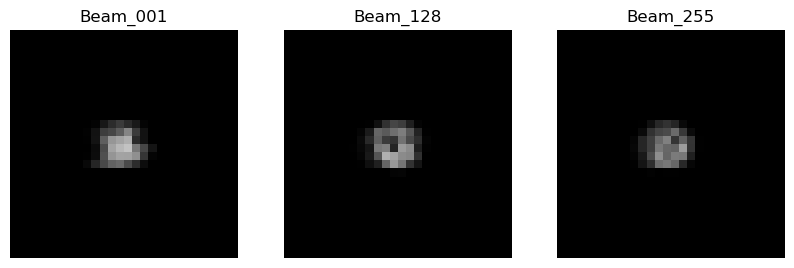

In [9]:
# Load the samples
images, labels, class_names = load_samples_from_folder(dataset_folder,(28,28),'RGB')

# Plot Samples
plot_samples(images, labels, class_names)

#### 56x56x1 px

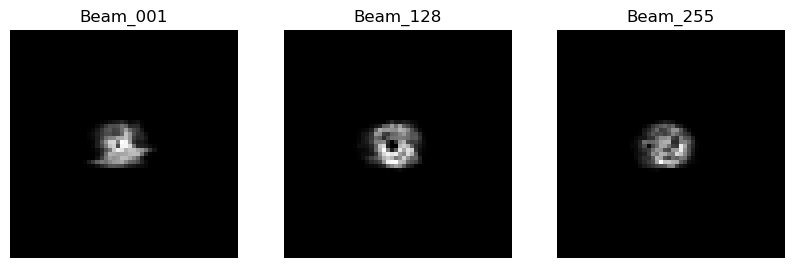

In [10]:
# Load the samples
images, labels, class_names = load_samples_from_folder(dataset_folder,(56,56),'L')

# Plot Samples
plot_samples(images, labels, class_names)

### Save Datasets

In [11]:
# Load the dataset
images, labels, class_names = load_images_from_folder(dataset_folder,(56,56),'RGB')

# Check dataset properties
print(f"Dataset contains {len(images)} images")
print(f"Image shape: {images[0].shape}")
print(f"Images size: {images.nbytes/1024/1024/1024} GB")

# Save the dataset
np.save(r'.\Dataset\images_56.npy', images)
np.save(r'.\Dataset\labels.npy', labels)
np.save(r'.\Dataset\class_names.npy', np.array(class_names))

print("Dataset saved")


Dataset contains 255000 images
Image shape: (56, 56, 3), Label: 0, Class: Beam_001
Dataset saved


In [22]:
# Load the dataset
images, labels, class_names = load_images_from_folder(dataset_folder,(56,56),'L')

# Check dataset properties
print(f"Dataset contains {len(images)} images")
print(f"Image shape: {images[0].shape}")
print(f"Images size: {images.nbytes/1024/1024/1024} GB")

# Save the dataset
np.save(r'.\Dataset\images_56L.npy', images)

print("Dataset saved")

Dataset contains 255000 images
Image shape: (56, 56, 1)
Images size: 0.7447600364685059 GB
Dataset saved


In [23]:
# Load the dataset
images, labels, class_names = load_images_from_folder(dataset_folder,(28,28),'RGB')

# Check dataset properties
print(f"Dataset contains {len(images)} images")
print(f"Image shape: {images[0].shape}")
print(f"Images size: {images.nbytes/1024/1024/1024} GB")

# Save the dataset
np.save(r'.\Dataset\images_28.npy', images)

print("Dataset saved")

Dataset contains 255000 images
Image shape: (28, 28, 3)
Images size: 0.5585700273513794 GB
Dataset saved
